In [67]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import auc, roc_curve, RocCurveDisplay
import joblib

In [3]:
# Importing dataset
insurance_df = pd.read_csv("Medical_Cost_Personal_Insurance.csv") 

In [4]:
# Displaying first 5 rows
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Displaying last 5 rows
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
# Displaying number of rows and columns in the dataset
insurance_df.shape

(1338, 7)

In [7]:
# Displaying columns name
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
# Displaying the datatype of the columns
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
# Checking for the null values in the dataset
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# Few columns in the dataset have categorical values so, need them to encode
encoder = LabelEncoder()

In [13]:
insurance_df['sex'] = encoder.fit_transform(insurance_df['sex'])
insurance_df['smoker'] = encoder.fit_transform(insurance_df['smoker'])
insurance_df['region'] = encoder.fit_transform(insurance_df['region'])

In [14]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


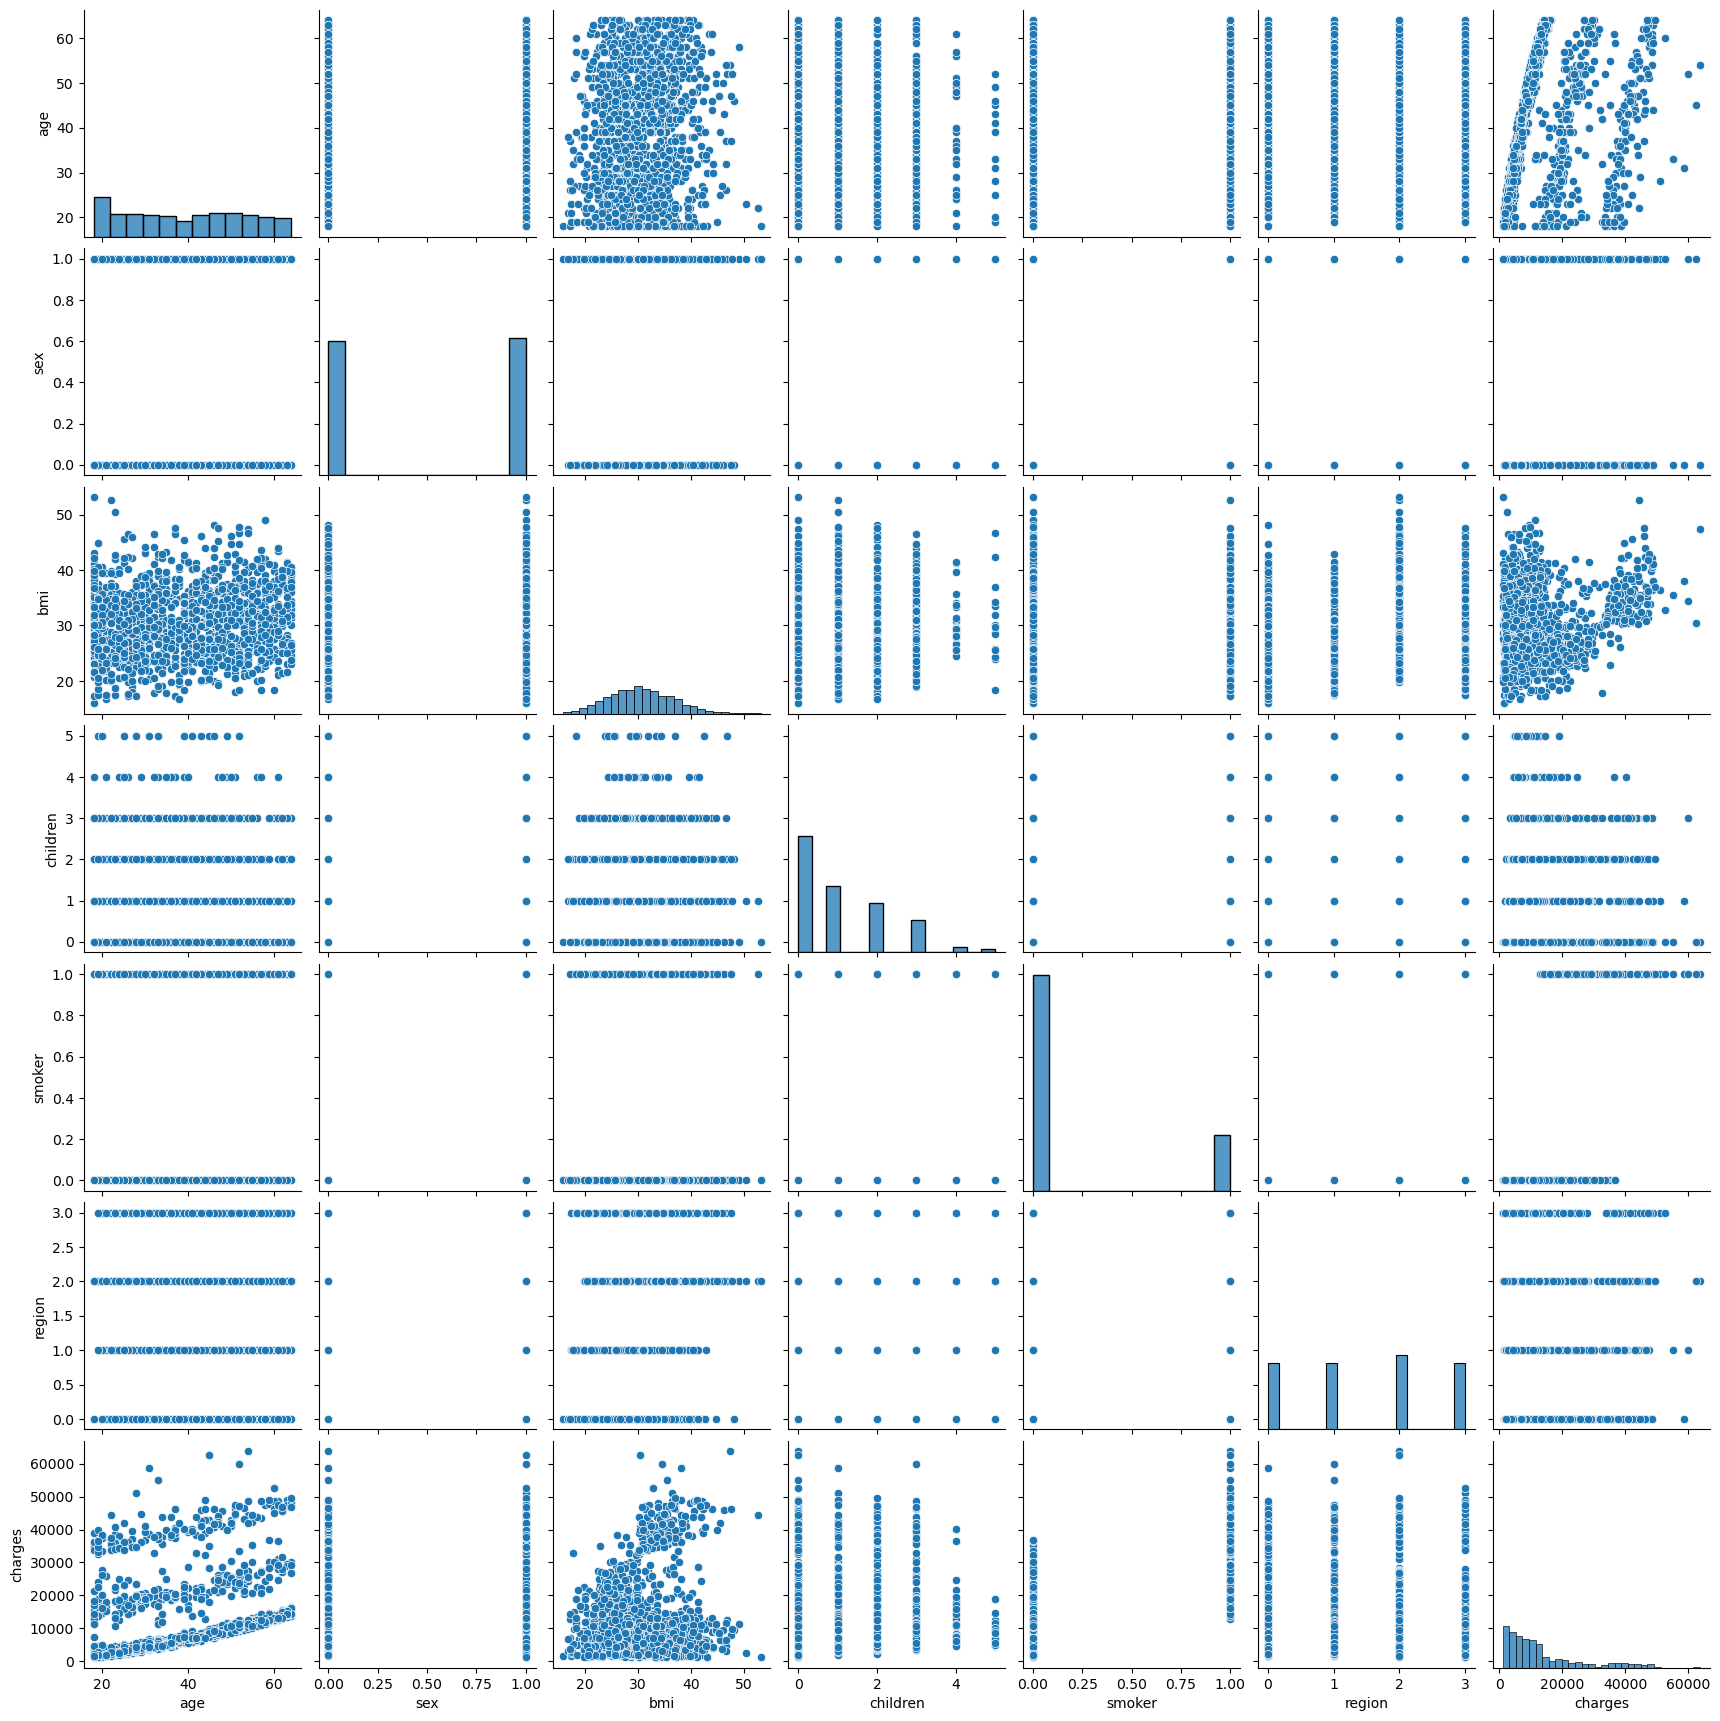

In [15]:
sns.pairplot(insurance_df)
plt.show()

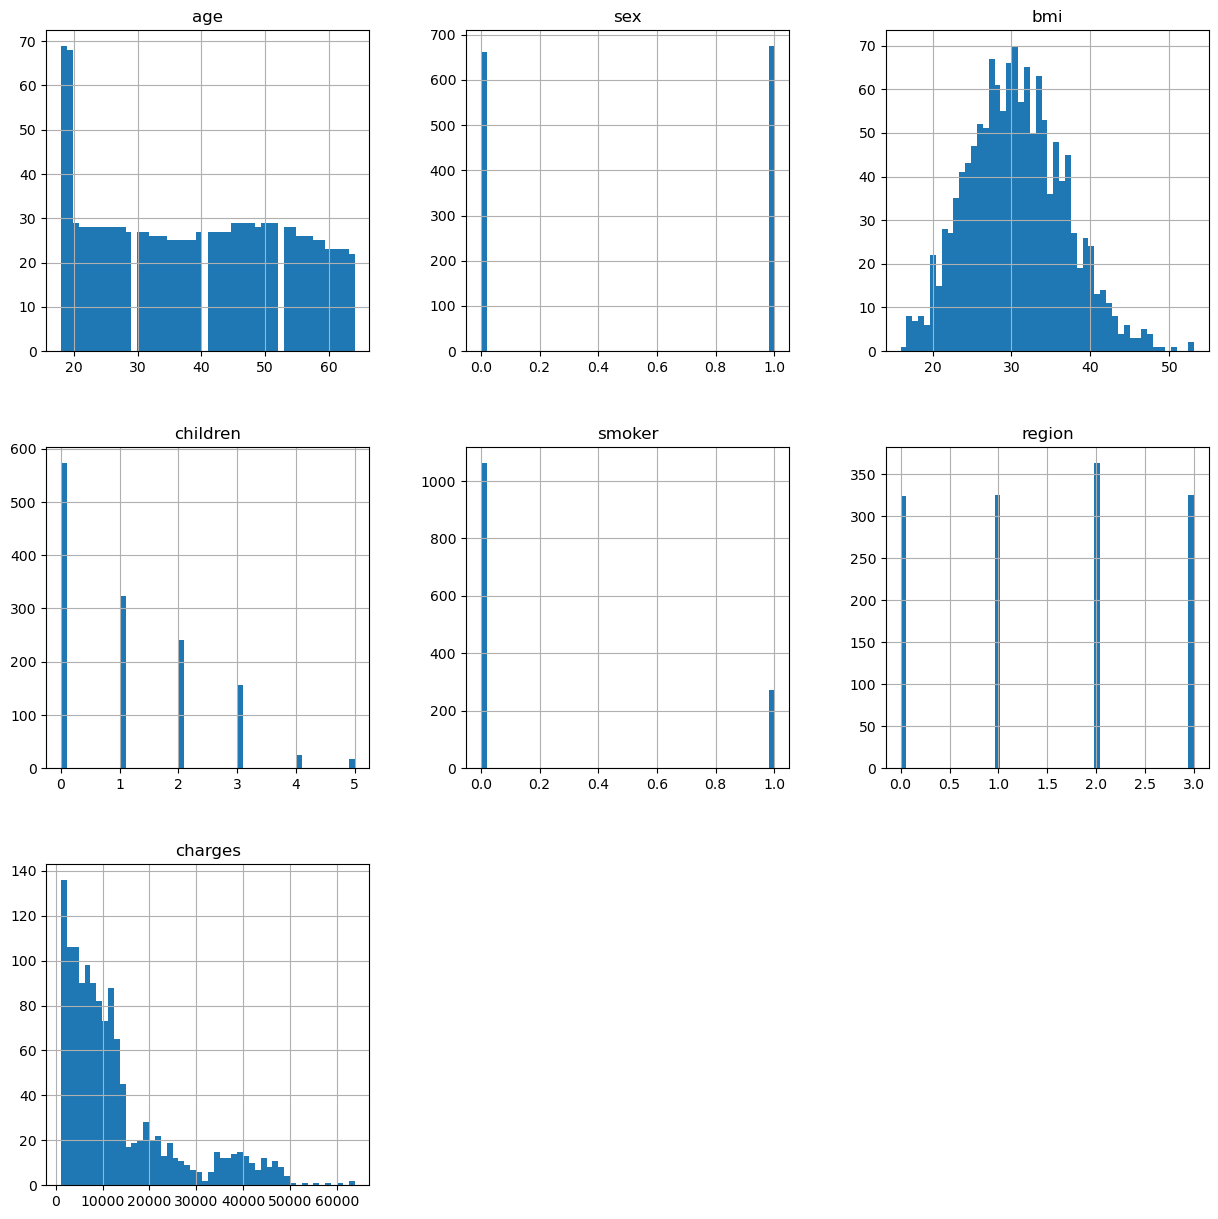

In [16]:
insurance_df.hist(figsize = (15, 15), bins = 50)
plt.show()

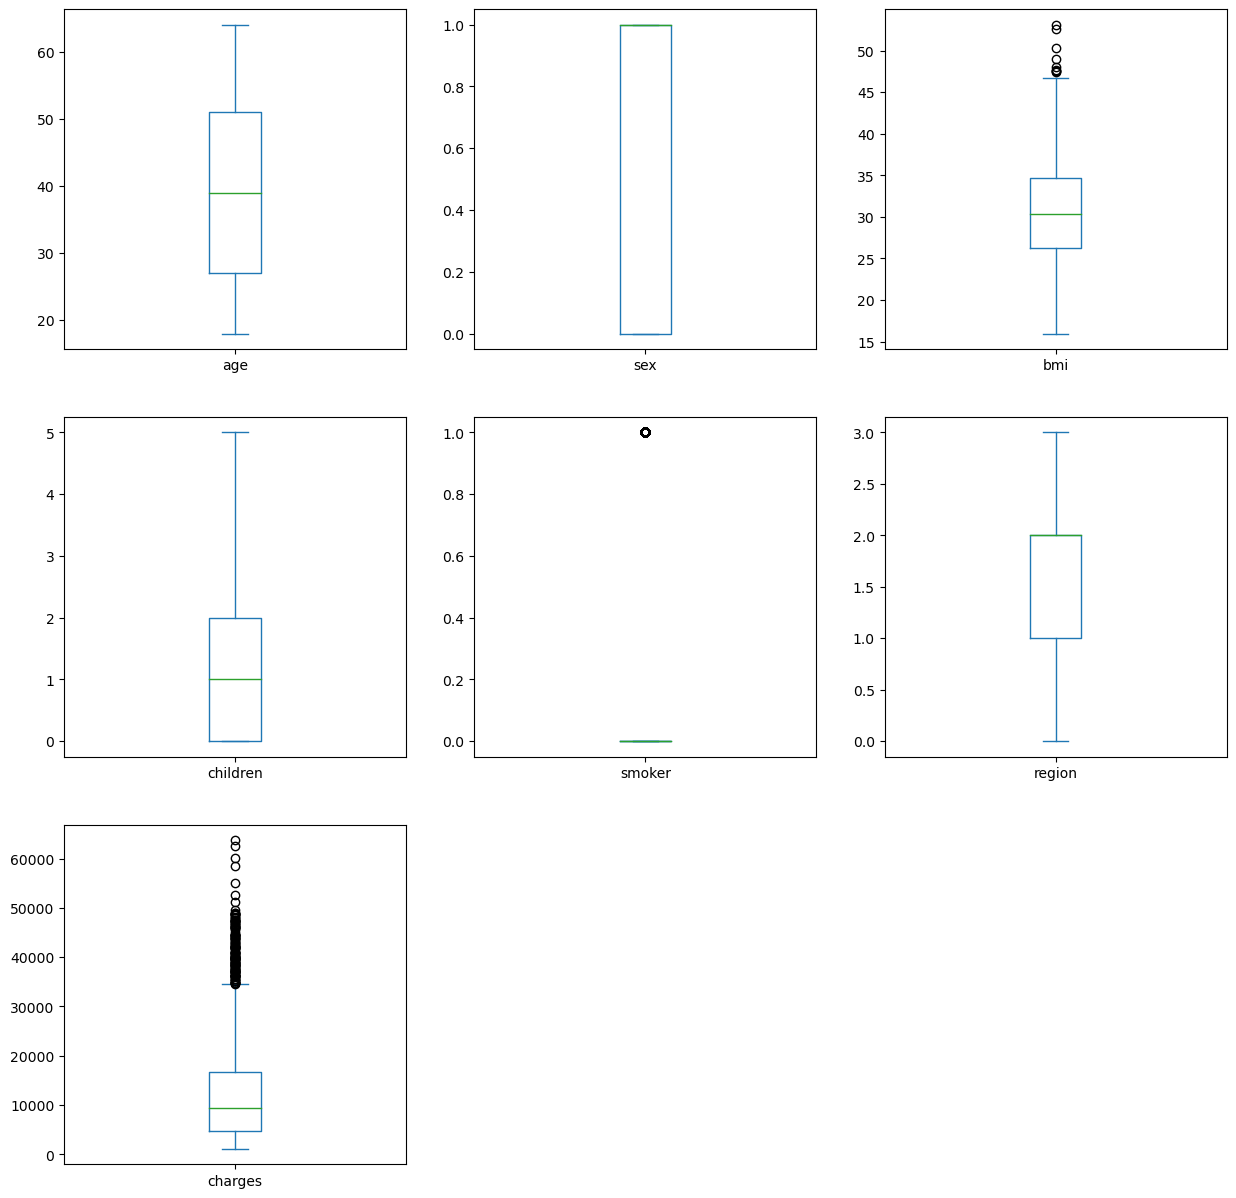

In [17]:
# Checking for the outliers

# Using boxplot
insurance_df.plot(kind = 'box', subplots = True, figsize = (15, 15), layout = (3,3))
plt.show()

In [18]:
# Using Z-Score
z_score = abs(zscore(insurance_df))
z_score

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905,0.298584
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495,0.953689
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495,0.728675
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915,0.719843
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915,0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915,0.220551
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326,0.914002
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495,0.961596
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905,0.930362


In [19]:
# Removing Outliers
z = 3
df1= insurance_df[(z_score < z).all(axis=1)]
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [20]:
# Checking correalation coefficient
correlation_coefficient = df1.corr()
correlation_coefficient

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019253,0.118178,0.059100,-0.029090,0.003121,0.305263
sex,-0.019253,1.000000,0.042498,0.014056,0.079058,0.003084,0.059455
bmi,0.118178,0.042498,1.000000,0.029916,-0.005288,0.160126,0.191453
children,0.059100,0.014056,0.029916,1.000000,0.028844,-0.002976,0.100438
smoker,-0.029090,0.079058,-0.005288,0.028844,1.000000,-0.003474,0.785129
region,0.003121,0.003084,0.160126,-0.002976,-0.003474,1.000000,-0.007633
charges,0.305263,0.059455,0.191453,0.100438,0.785129,-0.007633,1.000000


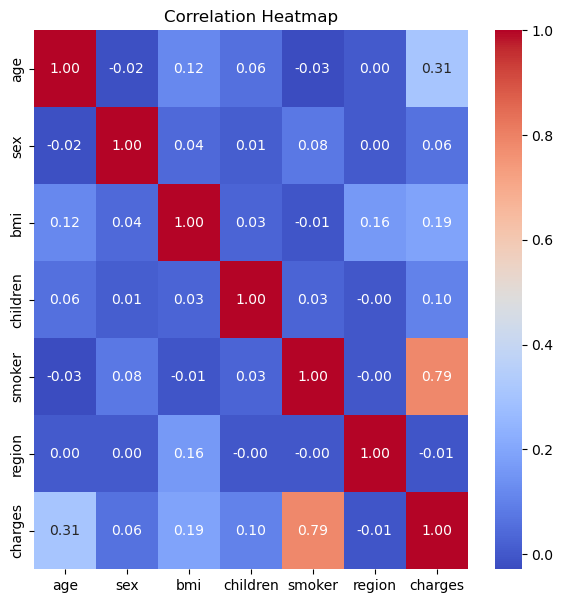

In [21]:
# Plotting correlation coefficient using heatmap
plt.figure(figsize=(7,7))
sns.heatmap(correlation_coefficient, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

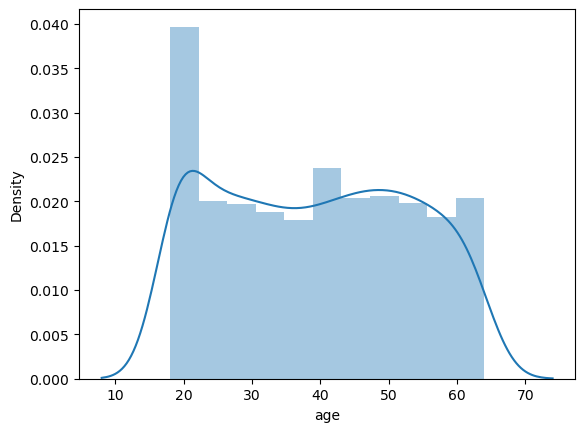

In [22]:
# Checking skewness

# Using distplot
sns.distplot(insurance_df['age'])
plt.show()

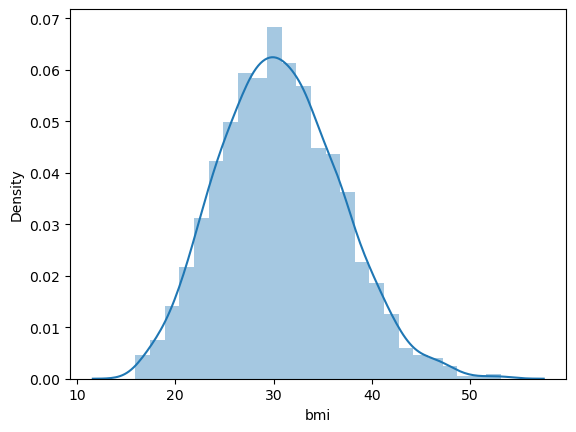

In [23]:
sns.distplot(insurance_df['bmi'])
plt.show()

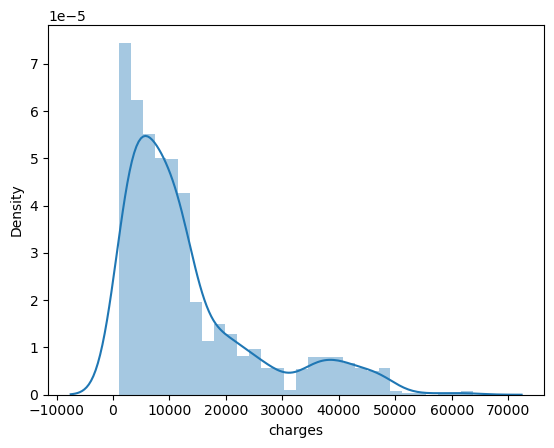

In [24]:
sns.distplot(insurance_df['charges'])
plt.show()

In [25]:
# Checking skewness using skew() method
df1.skew()

age         0.051340
sex        -0.010708
bmi         0.191432
children    0.738119
smoker      1.482731
region     -0.023027
charges     1.437160
dtype: float64

In [26]:
# Feature scaling
features = df1.drop('charges', axis = 1)
target = df1['charges']

scaler = StandardScaler()
scaled_df= scaler.fit_transform(features)

In [27]:
features

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [28]:
target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1309, dtype: float64

In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
df2 = pd.DataFrame(scaled_data, columns = features.columns[:])
df2

,age,sex,bmi,children,smoker,region
0,-1.439063,-1.005362,-0.449359,-0.929616,1.984848,1.352753
1,-1.510086,0.994667,0.533391,-0.040093,-0.503817,0.447460
2,-0.799859,0.994667,0.404478,1.738954,-0.503817,0.447460
3,-0.444746,0.994667,-1.319101,-0.929616,-0.503817,-0.457833
4,-0.515769,0.994667,-0.285288,-0.929616,-0.503817,-0.457833
...,...,...,...,...,...,...
1304,0.762639,0.994667,0.064617,1.738954,-0.503817,-0.457833
1305,-1.510086,-1.005362,0.223666,-0.929616,-0.503817,-1.363127
1306,-1.510086,-1.005362,1.049041,-0.929616,-0.503817,0.447460
1307,-1.297018,-1.005362,-0.800939,-0.929616,-0.503817,1.352753


In [30]:
X = df2

In [31]:
y = target

In [32]:
# Splitting dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [33]:
# Using different regression models for prdicting insurance cost

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_lr)
msqe = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2score = r2_score(y_test, y_pred_lr)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 4176.600537996764
mean_squared_error: 35501160.528713435
root_mean_absolute_error: 5958.285032516776
r2_score: 0.7745005032412913


In [35]:
# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_lasso)
msqe = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2score = r2_score(y_test, y_pred_lasso)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 4176.573518777218
mean_squared_error: 35503628.26345718
root_mean_absolute_error: 5958.4921132327745
r2_score: 0.77448482845955


In [36]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_ridge)
msqe = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2score = r2_score(y_test, y_pred_ridge)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 4178.900965321582
mean_squared_error: 35518136.961826324
root_mean_absolute_error: 5959.709469582081
r2_score: 0.7743926707911205


In [37]:
# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors = 3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred_knn)
msqe = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2score = r2_score(y_test, y_pred_knn)
print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 3211.6807586344366
mean_squared_error: 29223769.032570094
root_mean_absolute_error: 5405.901315467208
r2_score: 0.8143738088531689


In [38]:
# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_svr)
msqe = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2score = r2_score(y_test, y_pred_svr)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 9032.535149479596
mean_squared_error: 186971059.42111626
root_mean_absolute_error: 13673.736117869039
r2_score: -0.18761976172028816


In [39]:
# Decision Tree Regressor
dtr_model = DecisionTreeRegressor(criterion = 'mse', random_state = 7)
dtr_model.fit(X_train, y_train)
y_pred_dtr = dtr_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_dtr)
msqe = mean_squared_error(y_test, y_pred_dtr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dtr))
r2score = r2_score(y_test, y_pred_dtr)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 3039.7443131170485
mean_squared_error: 42690512.73105896
root_mean_absolute_error: 6533.797726518549
r2_score: 0.7288345227633065


In [40]:
# Random Forest Regressor 
rfr_model = RandomForestRegressor(random_state = 1)
rfr_model.fit(X_train, y_train)
y_pred_rfr = rfr_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_rfr)
msqe = mean_squared_error(y_test, y_pred_rfr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
r2score = r2_score(y_test, y_pred_rfr)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 2714.8244695173494
mean_squared_error: 22294007.350837328
root_mean_absolute_error: 4721.653031602103
r2_score: 0.8583908986782929


In [41]:
# XGBoost Regressor
xgbr_model = xgb.XGBRegressor(random_state = 1)
xgbr_model.fit(X_train, y_train)
y_pred_xgbr = xgbr_model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred_xgbr)
msqe = mean_squared_error(y_test, y_pred_xgbr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgbr))
r2score = r2_score(y_test, y_pred_xgbr)
print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 2910.4141549191663
mean_squared_error: 26030377.38927521
root_mean_absolute_error: 5101.997392127441
r2_score: 0.834657884015558


In [42]:
# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred_gbr)
msqe = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2score = r2_score(y_test, y_pred_gbr)
print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 2294.3739654542355
mean_squared_error: 19128607.27827813
root_mean_absolute_error: 4373.626330435435
r2_score: 0.8784971744386235


In [43]:
# Extra Trees Regressor
etc_model = ExtraTreesRegressor()
etc_model.fit(X_train, y_train)
y_pred_etc = etc_model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred_etc)
msqe = mean_squared_error(y_test, y_pred_etc)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_etc))
r2score = r2_score(y_test, y_pred_etc)
print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 2558.038527019364
mean_squared_error: 24367966.515902475
root_mean_absolute_error: 4936.392054517396
r2_score: 0.8452173364325729


In [45]:
# Applying Cross Validation Methods on each model

# For Logistic Regression
cv_score = cross_val_score(lr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_lr) - cv_score.mean())

[0.76337332 0.71273583 0.78072916 0.73045788 0.76622267]
0.7507037701961409
Difference between R2 score and cross validation score: 0.023796733045150398


In [46]:
# For Lasso Regression
cv_score = cross_val_score(lasso_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_lasso) - cv_score.mean())

[0.76337505 0.71275985 0.7807142  0.73045566 0.76622802]
0.7507065591488712
Difference between R2 score and cross validation score: 0.023778269310678835


In [47]:
# For Ridge Regression
cv_score = cross_val_score(ridge_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_ridge) - cv_score.mean())

[0.7633537  0.71279257 0.78063397 0.73052688 0.76622221]
0.750705866775889
Difference between R2 score and cross validation score: 0.02368680401523149


In [49]:
# For K-Nearest Neighbors 
cv_score = cross_val_score(knn_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_knn) - cv_score.mean())

[0.7938343  0.74569601 0.81830362 0.78794883 0.78851939]
0.7868604290490896
Difference between R2 score and cross validation score: 0.027513379804079308


In [48]:
# For Support Vector Regressor
cv_score = cross_val_score(svr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_svr) - cv_score.mean())

[-0.10950253 -0.10909091 -0.06727152 -0.09799697 -0.10077012]
-0.09692641002300766
Difference between R2 score and cross validation score: -0.0906933516972805


In [50]:
# For K-Nearest Neighbors
cv_score = cross_val_score(knn_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_knn) - cv_score.mean())

[0.7938343  0.74569601 0.81830362 0.78794883 0.78851939]
0.7868604290490896
Difference between R2 score and cross validation score: 0.027513379804079308


In [51]:
# For Decision Tree Regressor
cv_score = cross_val_score(dtr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_dtr) - cv_score.mean())

[0.76985997 0.66278761 0.62763001 0.72987022 0.67068014]
0.6921655904019124
Difference between R2 score and cross validation score: 0.036668932361394124


In [52]:
# For Random Forest Regressor
cv_score = cross_val_score(rfr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_rfr) - cv_score.mean())

[0.8543798  0.78250172 0.85755347 0.8303249  0.84974062]
0.8349000995567624
Difference between R2 score and cross validation score: 0.023490799121530515


In [53]:
# For XGBoost Regressor
cv_score = cross_val_score(xgbr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_xgbr) - cv_score.mean())

[0.81641007 0.74948171 0.82997048 0.81011395 0.82065616]
0.8053264721826465
Difference between R2 score and cross validation score: 0.029331411832911436


In [54]:
# For Gradient Boosting Regressor
cv_score = cross_val_score(gbr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_gbr) - cv_score.mean())

[0.87801961 0.80540266 0.88390216 0.84541483 0.8638385 ]
0.8553155517020425
Difference between R2 score and cross validation score: 0.023181622736580976


In [55]:
# For Extra Trees Regressor
cv_score = cross_val_score(etc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_etc) - cv_score.mean())

[0.83308852 0.75768045 0.83674041 0.81050535 0.84145019]
0.8158929851508369
Difference between R2 score and cross validation score: 0.02932435128173605


Support Vector Regressor model has given least difference between R2 score and cross validation score that is -0.0906933516972805

Support Vector Regressor model is the best model

In [70]:
# Hyper parameter tuning
parameters_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'epsilon': [0.1, 0.01, 0.001],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}

In [71]:
grid_search_cv = GridSearchCV(SVR(), parameters_grid, cv = 5, scoring = make_scorer(r2_score))

In [ ]:
grid_search_cv.fit(X_train, y_train)